In [1]:
import os
import numpy as np

import datetime as dt

import netCDF4
from netCDF4 import Dataset, num2date

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import cmocean

import matplotlib as mpl
from matplotlib import pyplot as plt

%matplotlib inline

libarrow.so.900: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libpodofo.so.0.9.8: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory
libarrow.so.900: cannot open shared object file: No such file or directory


In [2]:
import pandas as pd

cv = pd.read_csv('CS_cover.csv')
df2 = pd.read_csv('2016AerialSurvey.csv')
sp3 = pd.read_csv('CS_species.csv')


In [3]:
selectedVariable = cv['coveragechange'][:] 
selectedVariable2 = df2['BleachingCategory'][:] 
selectedVariable3 = sp3['change'][:] 

In [4]:
Lon=cv ['longitude'][:]
Lat=cv ['latitude'][:]

Lon2=df2 ['Longitude'][:]
Lat2=df2 ['Latitude'][:]

Lon3=sp3 ['longitude'][:]
Lat3=sp3 ['latitude'][:]

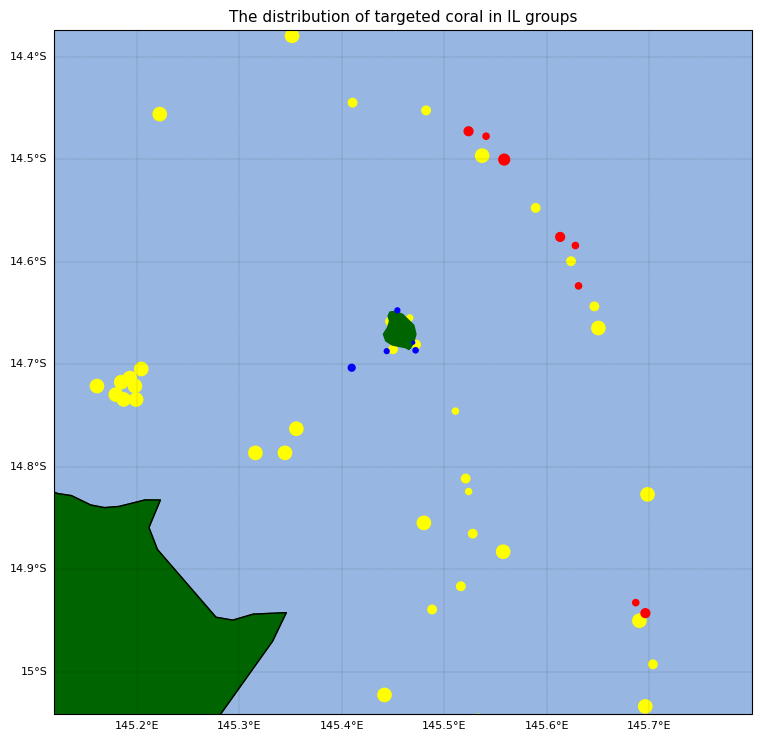

In [6]:
fig = plt.figure(figsize=(9,10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())
range = [145.1195, 145.80, -15.0415,-14.3740]
ax.set_extent(range)

ax.scatter(Lon, Lat,transform=ccrs.PlateCarree(), s = 2000*abs(selectedVariable), color = 'red', zorder = 10)
ax.scatter(Lon2, Lat2,transform=ccrs.PlateCarree(),s=3**selectedVariable2+10,color = 'yellow')
ax.scatter(Lon3, Lat3,transform=ccrs.PlateCarree(), s = 2*abs(selectedVariable3), color = 'blue', zorder = 10)


ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m', 
                                            edgecolor='face', 
                                            facecolor='darkgreen'))

ax.coastlines(linewidth=1)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='k', alpha=1, 
                  linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8} 

plt.title('The distribution of target coral reefs in IL groups', 
          fontsize=11);